<a href="https://colab.research.google.com/github/Airinelizabath/PROGRAMREPO/blob/main/gradientdescents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stochastic Gradient Descent (LINEAR REGRESSION)**
(tensorflow)

In [ ]:
pip install tflearn

     |████████████████████████████████| 112kB 5.4MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=0ba99515c2917b5d0f8701bbe32ec5abef36dde7c3e69e2b63c0a8a626ef9560
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [ ]:
  
""" Linear Regression Example """

from __future__ import absolute_import, division, print_function

import tflearn

# Regression data
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]

# Linear Regression graph
input_ = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_)
regression = tflearn.regression(linear, optimizer='sgd', loss='mean_square',
                                metric='R2', learning_rate=0.01)
m = tflearn.DNN(regression)
m.fit(X, Y, n_epoch=1000, show_metric=True, snapshot_epoch=False)

print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))

print("\nTest prediction for x = 3.2, 3.3, 3.4:")
print(m.predict([3.2, 3.3, 3.4]))
# should output (close, not exact) y = [1.5315033197402954, 1.5585315227508545, 1.5855598449707031]

Training Step: 1000  | total loss: 0.16112 | time: 0.006s
| SGD | epoch: 1000 | loss: 0.16112 - R2: 0.6783 -- iter: 17/17

Regression result:
Y = [0.284949]*X + [0.56261945]

Test prediction for x = 3.2, 3.3, 3.4:
[1.4744563 1.5029511 1.5314461]


**GRADIENT DESCENT (LINEAR REGRESSION)**

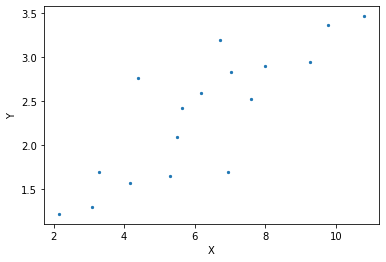

In [ ]:
import pandas as pd  
import numpy as np
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X, Y, s = 5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
def fit(X, Y, w, b, alpha):
  dl_dw = 0.0
  dl_db = 0.0
  N = len(X)
  for i in range(N):
    dl_dw += X[i] * ((w*X[i] + b)-Y[i])
    dl_db += ((w*X[i] + b)-Y[i])
    w = w - (1/float(N)) * dl_dw * alpha
    b = b - (1/float(N)) * dl_db * alpha
    return w, b
def cost_function (X, Y, w, b):
    N = len(X)
    total_error = 0.0
    for i in range(N):
        total_error += ((w*X[i] + b)-Y[i])**2
    return total_error / (2*float(N))
#cost_function(X_train,Y_train,0.0,0.0)
def train(X, Y, w, b, alpha, n_iter):
    for i in range(n_iter):
        w, b = fit(X, Y, w, b, alpha)
        if i % 10 == 0:
            print ("iteration:", i, "cost: ", cost_function(X, Y, w, b))
    return w, b
def predict(x, w, b):
	return x*w + b
def mse(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)
def plot_regression_line(x, tx,ty, w,b):
	plt.scatter(tx, ty, color = "r", s = 30)
	y_pred = w + b*x
	plt.plot(x, y_pred, color = "g")
plt.show()


In [ ]:
w,b=train(X_train,Y_train, 0.0, 0.0, 0.00001, 50)

iteration: 0 cost:  2.9797592429871056
iteration: 10 cost:  2.9780799291036106
iteration: 20 cost:  2.976401576604772
iteration: 30 cost:  2.974724184942367
iteration: 40 cost:  2.9730477535684883


**Mini-Batch Gradient Descent**

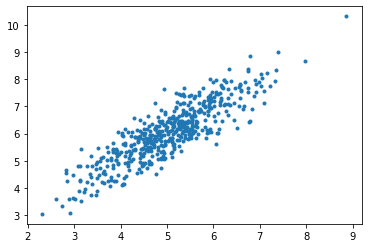

Number of examples in training set =  7200
Number of examples in testing set =  800


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 


mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 


plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 


data = np.hstack((np.ones((data.shape[0], 1)), data)) 

split_factor = 0.90
split = int(split_factor * data.shape[0]) 

X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 



In [ ]:
# linear regression using "mini-batch" gradient descent 

def hypothesis(X, theta): 
	return np.dot(X, theta) 

def gradient(X, y, theta): 
	h = hypothesis(X, theta) 
	grad = np.dot(X.transpose(), (h - y)) 
	return grad 


def cost(X, y, theta): 
	h = hypothesis(X, theta) 
	J = np.dot((h - y).transpose(), (h - y)) 
	J /= 2
	return J[0] 

# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
	mini_batches = [] 
	data = np.hstack((X, y)) 
	np.random.shuffle(data) 
	n_minibatches = data.shape[0] // batch_size 
	i = 0

	for i in range(n_minibatches + 1): 
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
		X_mini = mini_batch[:, :-1] 
		Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
		mini_batches.append((X_mini, Y_mini)) 
	if data.shape[0] % batch_size != 0: 
		mini_batch = data[i * batch_size:data.shape[0]] 
		X_mini = mini_batch[:, :-1] 
		Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
		mini_batches.append((X_mini, Y_mini)) 
	return mini_batches 

# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
	theta = np.zeros((X.shape[1], 1)) 
	error_list = [] 
	max_iters = 3
	for itr in range(max_iters): 
		mini_batches = create_mini_batches(X, y, batch_size) 
		for mini_batch in mini_batches: 
			X_mini, y_mini = mini_batch 
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
			error_list.append(cost(X_mini, y_mini, theta)) 

	return theta, error_list 


Bias =  [0.79944613]
Coefficients =  [[1.06241492]]


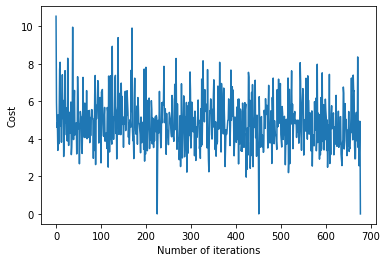

In [ ]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 

# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 


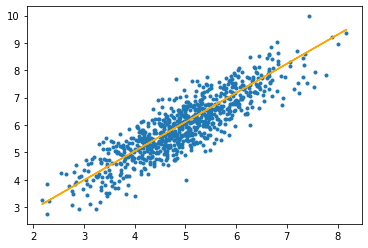

Mean absolute error =  0.4583933400647653


In [ ]:
# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 

# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 
